<a href="https://colab.research.google.com/github/alangan17/smazc01/blob/main/SMAZC_01_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Markets Analytics Zoomcamp Week1

Repo: https://github.com/DataTalksClub/stock-markets-analytics-zoomcamp/tree/main/01-intro-and-data-sources

# Dependencies

In [ ]:
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# Introduction


In this homework, we're going to download finance data from various sources and make simple calculations/analysis.


# Question 1: [Macro] Average growth of GDP in 2023

**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1).
Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers).
Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer  5.7

In [ ]:
start = date(year=2022, month=1, day=1)
df1 = pdr.DataReader("GDPC1", "fred", start=start)
df1.reset_index(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    8 non-null      datetime64[ns]
 1   GDPC1   8 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 256.0 bytes


In [ ]:
df1['gdp_growth_yoy'] = df1.GDPC1/df1.GDPC1.shift(4)-1
df1.tail(8)

,DATE,GDPC1,gdp_growth_yoy
0,2022-01-01,21738.871,NaN
1,2022-04-01,21708.160,NaN
2,2022-07-01,21851.134,NaN
3,2022-10-01,21989.981,NaN
4,2023-01-01,22112.329,0.017179
5,2023-04-01,22225.350,0.023825
6,2023-07-01,22490.692,0.029269
7,2023-10-01,22679.255,0.031345


In [ ]:
df1_2023 = df1[df1['DATE'].dt.year == 2023]
average_gdpc1_us_yoy_2023 = round(df1_2023['gdp_growth_yoy'].mean() * 100, 1)
print(f"Average Year to Year GDP Growth in 2023: {average_gdpc1_us_yoy_2023}%")

Average Year to Year GDP Growth in 2023: 2.5%


# Question 2. [Macro] Inverse "Treasury Yield"

*Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**


Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)


In [ ]:
start = date(year=2000, month=1, day=1)
# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity
df2_dgs2 = pdr.DataReader("DGS2", "fred", start=start)
df2_dgs2.reset_index(inplace=True)
df2_dgs2.info()

# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity
df2_dgs10 = pdr.DataReader("DGS10", "fred", start=start)
df2_dgs10.reset_index(inplace=True)
df2_dgs10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    6339 non-null   datetime64[ns]
 1   DGS2    6078 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    6339 non-null   datetime64[ns]
 1   DGS10   6078 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.2 KB


In [ ]:
df2 = pd.merge(df2_dgs2, df2_dgs10, on='DATE', how='inner')
df2['dgs10-dgs2'] = round(df2['DGS10'] - df2['DGS2'], 1)
df2

,DATE,DGS2,DGS10,dgs10-dgs2
0,2000-01-03,6.38,6.58,0.2
1,2000-01-04,6.30,6.49,0.2
2,2000-01-05,6.38,6.62,0.2
3,2000-01-06,6.35,6.57,0.2
4,2000-01-07,6.31,6.52,0.2
...,...,...,...,...
6334,2024-04-12,4.88,4.50,-0.4
6335,2024-04-15,4.93,4.63,-0.3
6336,2024-04-16,4.97,4.67,-0.3
6337,2024-04-17,4.93,4.59,-0.3


In [ ]:
df2[df2['dgs10-dgs2'] == df2['dgs10-dgs2'].min()]

,DATE,DGS2,DGS10,dgs10-dgs2
6047,2023-03-08,5.05,3.98,-1.1
6129,2023-06-30,4.87,3.81,-1.1
6130,2023-07-03,4.94,3.86,-1.1


# Question 3. [Index] Which Index is better recently?

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [ ]:
df3_sp500 = yf.download(
        '^GSPC',
        start='2019-04-09',
        end='2024-04-10'
    )
df3_sp500.reset_index(inplace=True)
df3_sp500.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [ ]:
print(df3_sp500.head(1)[['Date', 'Adj Close']])
print(df3_sp500.tail(1)[['Date', 'Adj Close']])

        Date    Adj Close
0 2019-04-09  2878.199951
           Date    Adj Close
1258 2024-04-09  5209.910156


In [ ]:
sp500_start_price = df3_sp500['Adj Close'].iloc[0]
sp500_end_price = df3_sp500['Adj Close'].iloc[-1]
sp500_growth_ratio = sp500_end_price / sp500_start_price
sp500_growth_ratio = int((sp500_growth_ratio-1)*100)
sp500_growth_ratio

81

In [ ]:
df3_mxx = yf.download(
        '^MXX',
        start='2019-04-09',
        end='2024-04-10'
    )
df3_mxx.reset_index(inplace=True)
df3_mxx.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [ ]:
print(df3_mxx.head(1)[['Date', 'Adj Close']])
print(df3_mxx.tail(1)[['Date', 'Adj Close']])

        Date     Adj Close
0 2019-04-09  45151.628906
           Date     Adj Close
1258 2024-04-09  57571.148438


In [ ]:
ipc_start_price = df3_mxx['Adj Close'].iloc[0]
ipc_end_price = df3_mxx['Adj Close'].iloc[-1]
ipc_growth_ratio = ipc_end_price / ipc_start_price
ipc_growth_ratio = int((ipc_growth_ratio-1)*100)
ipc_growth_ratio

27

# Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**


Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [ ]:
# Define the list of stock symbols
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Download 2023 daily OHLCV data for each stock
stock_data = {}
for stock_symbol in stocks:
    data = yf.download(stock_symbol, start='2023-01-01', end='2023-12-31')
    stock_data[stock_symbol] = data
    data.reset_index(inplace=True)

    print()
    print(stock_symbol)
    print(data.head(1)[['Date', 'Adj Close']])
    print(data.tail(1)[['Date', 'Adj Close']])

# Calculate the largest range ratio for each stock
largest_range_ratios = {}
for stock_symbol, data in stock_data.items():
    max_price = data['Adj Close'].max()
    min_price = data['Adj Close'].min()
    range_ratio = round((max_price - min_price) / max_price, 2)
    largest_range_ratios[stock_symbol] = range_ratio

# Find the stock with the largest range ratio
max_range_stock = max(largest_range_ratios, key=largest_range_ratios.get)
largest_range_ratio = largest_range_ratios[max_range_stock]

[*********************100%%**********************]  1 of 1 completed



2222.SR
        Date  Adj Close
0 2023-01-01  28.475792
          Date  Adj Close
247 2023-12-28  32.877789


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



BRK-B
        Date   Adj Close
0 2023-01-03  309.910004
          Date   Adj Close
249 2023-12-29  356.660004

AAPL
        Date   Adj Close
0 2023-01-03  124.216293
          Date   Adj Close
249 2023-12-29  192.284637

MSFT
        Date   Adj Close
0 2023-01-03  237.035995
          Date   Adj Close
249 2023-12-29  375.345886

GOOG
        Date  Adj Close
0 2023-01-03  89.699997
          Date   Adj Close
249 2023-12-29  140.929993


[*********************100%%**********************]  1 of 1 completed


JPM
        Date   Adj Close
0 2023-01-03  129.648514
          Date   Adj Close
249 2023-12-29  168.077133


In [ ]:
print(f"The stock with the largest range ratio in 2023 is {max_range_stock} with a ratio of {largest_range_ratio}.")

The stock with the largest range ratio in 2023 is MSFT with a ratio of 0.42.


# Question 5. [Stocks] Dividend Yield

**Find the largest dividend yield for the same set of stocks**

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [ ]:
dividend_data = {}
for stock_symbol in stocks:
    data = yf.Ticker(stock_symbol)
    dividends = data.dividends
    dividends = pd.DataFrame(dividends)
    dividends.reset_index(inplace=True)
    # dividends = dividends[dividends['Date'].dt.year == 2023]
    dividend_data[stock_symbol] = dividends

In [ ]:
dividend_yield = {}
for stock_symbol in stocks:
    print(stock_symbol)

    df_dividends = dividend_data[stock_symbol]
    df_stocks = stock_data[stock_symbol]

    # Sum up all dividends paid in 2023
    df_dividends = df_dividends[df_dividends['Date'].dt.year == 2023]
    total_dividends = df_dividends['Dividends'].sum()
    print(f"{total_dividends=}")

    # Get the closing price at the last trading day of the year
    last_trading_day = df_stocks.index[-1]
    closing_price = df_stocks.loc[last_trading_day]['Adj Close']
    print(f"{df_stocks.loc[last_trading_day]['Date']} : {closing_price}")

    # Calculate dividend yield
    yield_percentage = round((total_dividends / closing_price) * 100, 1)
    print(f"{yield_percentage=}")

    dividend_yield[stock_symbol] = yield_percentage
    print()

# Find the maximum dividend yield
max_dividend_yield_stock = max(dividend_yield, key=dividend_yield.get)
max_dividend_yield = dividend_yield[max_dividend_yield_stock]


2222.SR
total_dividends=0.9107640000000001
2023-12-28 00:00:00 : 32.87778854370117
yield_percentage=2.8

BRK-B
total_dividends=0.0
2023-12-29 00:00:00 : 356.6600036621094
yield_percentage=0.0

AAPL
total_dividends=0.95
2023-12-29 00:00:00 : 192.28463745117188
yield_percentage=0.5

MSFT
total_dividends=2.79
2023-12-29 00:00:00 : 375.34588623046875
yield_percentage=0.7

GOOG
total_dividends=0.0
2023-12-29 00:00:00 : 140.92999267578125
yield_percentage=0.0

JPM
total_dividends=4.05
2023-12-29 00:00:00 : 168.07713317871094
yield_percentage=2.4



In [ ]:
print(f"The stock with the largest dividend yield in 2023 is {max_dividend_yield_stock} with a yield of {max_dividend_yield}%.")

The stock with the largest dividend yield in 2023 is 2222.SR with a yield of 2.8%.


# Question 6. [Exploratory] Investigate new metrics

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

In [ ]:
def calculate_rsi(data, window=14):
    """
    Calculate the Relative Strength Index (RSI) for a given dataset.
    RSI is a momentum oscillator that measures the speed and change of price movements.
    It ranges from 0 to 100 and is typically used to identify overbought
        or oversold conditions in a market.
    High RSI values(>=70) may indicate overbought conditions,
        suggesting a potential reversal.
    Low RSI values (<=30) may indicate oversold conditions.

    Parameters:
        - data (DataFrame): DataFrame containing 'Close' prices.
        - window (int): Lookback period for RSI calculation (default is 14).

    Returns:
        - rsi (Series): Series containing RSI values.
    """
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys_rsi = series['RSI']
    ys_high = series['High']
    ys_low = series['Low']

    fig, ax1 = plt.subplots(figsize=(10, 5.2))

    # Plot RSI
    ax1.plot(xs, ys_rsi, label=f'RSI', color=palette[series_index % len(palette)])
    ax1.set_ylabel('RSI', color=palette[series_index % len(palette)])
    ax1.tick_params(axis='y', labelcolor=palette[series_index % len(palette)])
    ax1.legend(loc='upper left')

    # Add reference lines for oversold and overbought levels
    ax1.axhline(y=30, color='gray', linestyle='--')
    ax1.axhline(y=70, color='gray', linestyle='--')

    # Create a secondary y-axis for High and Low
    ax2 = ax1.twinx()
    ax2.plot(xs, ys_high, label=f'High', color='blue')
    ax2.plot(xs, ys_low, label=f'Low', color='red')
    ax2.set_ylabel('Price', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.legend(loc='lower right')

    plt.xlabel('Date')
    plt.title(f'{series_name} RSI, High, and Low')
    plt.grid(True)
    plt.show()

2222.SR


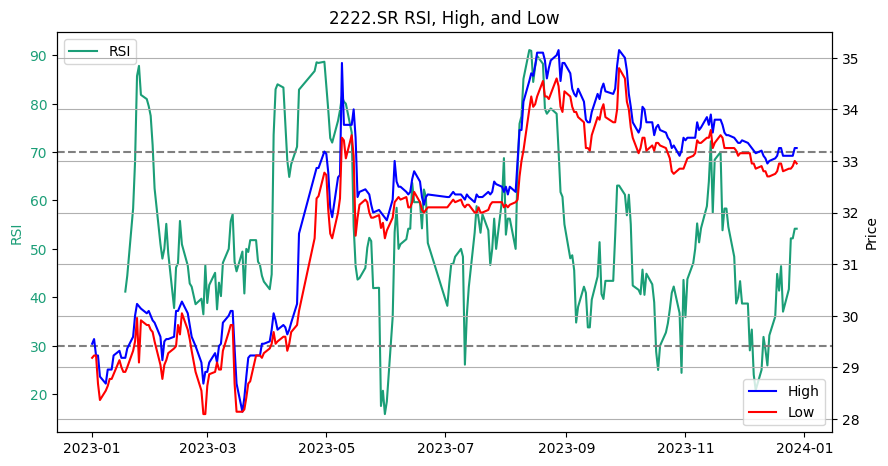

BRK-B


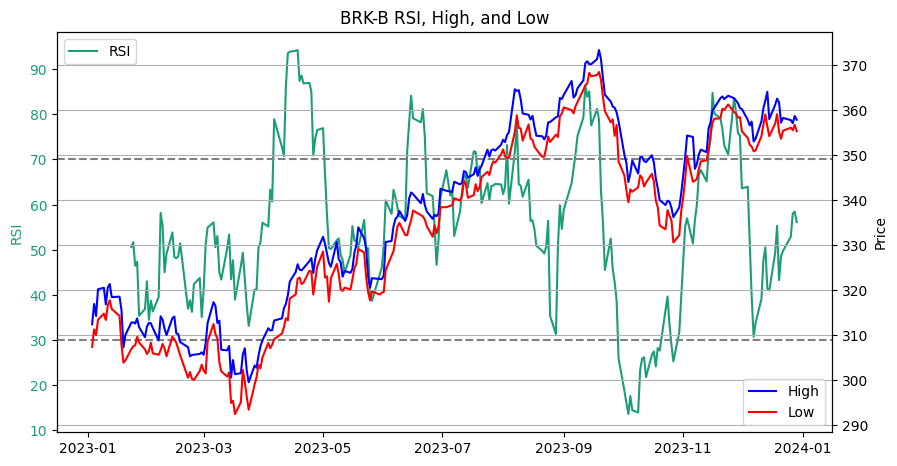

AAPL


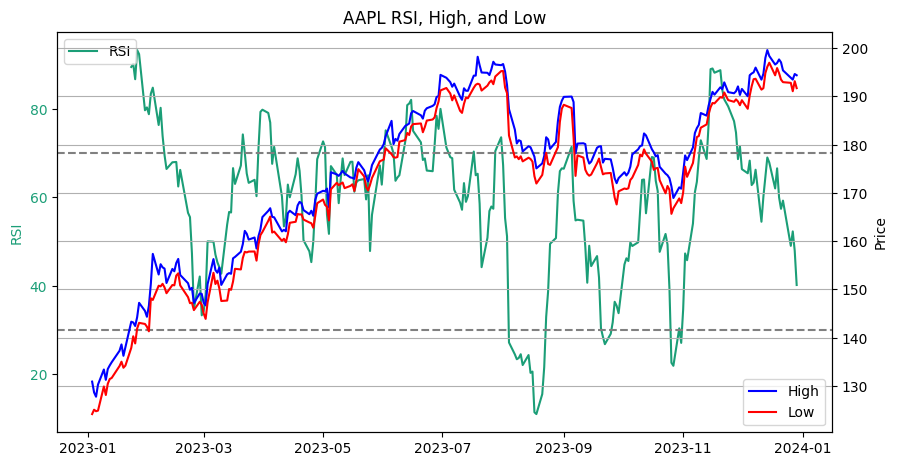

MSFT


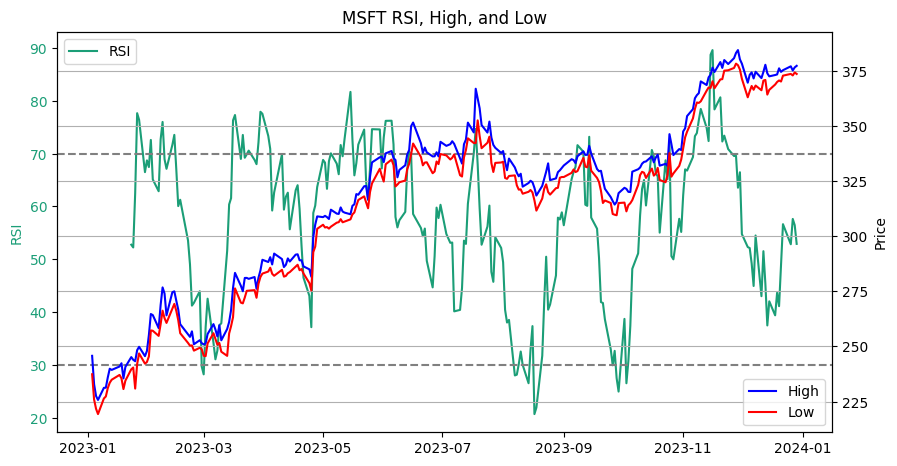

GOOG


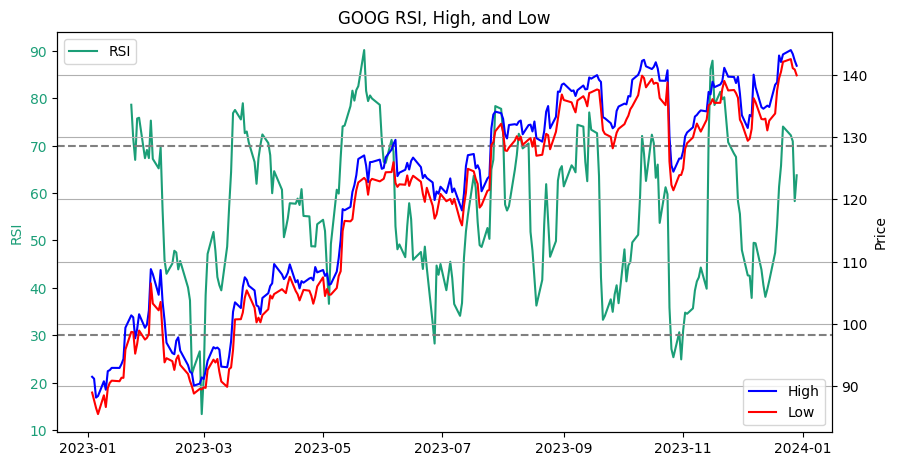

JPM


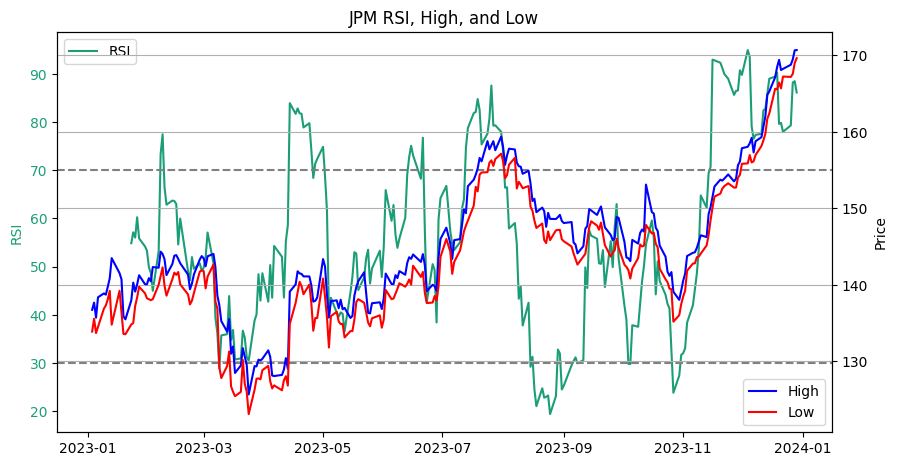

In [ ]:
for stock_symbol in stocks:
    print(stock_symbol)

    stock_data[stock_symbol]['RSI'] = calculate_rsi(stock_data[stock_symbol])

    df_sorted = stock_data[stock_symbol].sort_values('Date', ascending=True)
    _plot_series(df_sorted, stock_symbol)

# Question 7. [Exploratory] Time-driven strategy description around earnings releases

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08&symbol=MSFT


In [ ]:
stock_data['MSFT'][stock_data['MSFT']['Date'] == '2023-10-24']

,Date,Open,High,Low,Close,Adj Close,Volume,RSI
203,2023-10-24,331.299988,331.839996,327.600006,330.529999,329.251648,31153600,65.155874


In [ ]:
stock_data['MSFT'][stock_data['MSFT']['Date'] == '2023-10-25']

,Date,Open,High,Low,Close,Adj Close,Volume,RSI
204,2023-10-25,345.019989,346.200012,337.619995,340.670013,339.352448,55053800,72.239615


post-earnings trading strategies, to wait for the earnings announcement to be made and observe how the market reacts to the news. If the market overreacts and the stock price drops or rises sharply, a trader might consider buying or selling the stock